In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Heart.csv')

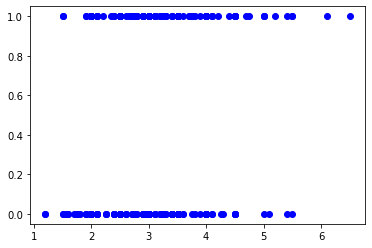

In [3]:
X = df['RestBP'].to_numpy()
y = df['AHD'].to_numpy()
size = X.shape[0]
for i in range(size):
    y[i] = 0 if y[i] == 'No' else 1
y = np.array(y, dtype=float)
X = X / 20 - 3.5
plt.scatter(X, y, color = 'blue')

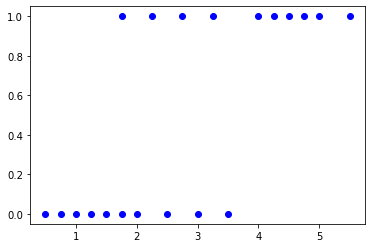

In [2]:
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
plt.scatter(X, y, color = 'blue')

# Logistic Regression

In [3]:
def sigmoid(x):
    return 1 / (1 + math.e**(-x))

In [4]:
from model.lossfunc import *

In [5]:
def logistic_sigmoid_regression(X, y, learning_rate = 0.05, tol = 1e-4, max_count = 10000):
    
    it = 0
    w = np.random.randn()
    b = np.random.randn()
    
    count = 0
    while count < max_count:
        y_hat = np.copy(y)
        mix_id = np.random.permutation(X.shape[0])
        for i in mix_id:
            Z = sigmoid(w * X[i] + b)
            y_hat[i] = Z
            w = w + learning_rate * (y[i] - Z) * X[i]
            b = b + learning_rate * (y[i] - Z)
            count += 1

        CrossEntropy(y, y_hat)
            
    return w,b

In [6]:
w, b = logistic_sigmoid_regression(X, y)
print(w, b)

1.4721324870394867 -4.130992388102264


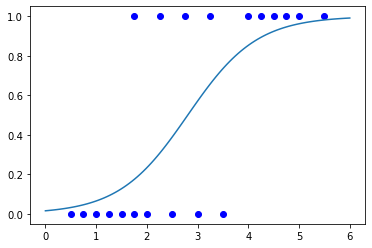

In [9]:
plt.scatter(X, y, color = 'blue')
line_x = np.linspace(0, 6, num = 110)
line_y = np.array([sigmoid(w * i + b) for i in line_x])

plt.plot(line_x, line_y)

In [11]:
for i in range(X.shape[0]):
    print(X[i], ',', y[i])

0.5 , 0
0.75 , 0
1.0 , 0
1.25 , 0
1.5 , 0
1.75 , 0
1.75 , 1
2.0 , 0
2.25 , 1
2.5 , 0
2.75 , 1
3.0 , 0
3.25 , 1
3.5 , 0
4.0 , 1
4.25 , 1
4.5 , 1
4.75 , 1
5.0 , 1
5.5 , 1


# Perceptron Learning Algorithm

In [ ]:
def trainWithPLA(train_X, train_y):

    col_1 = np.reshape(np.ones(size * 2, dtype = int), (8, 1))

    cal_X = np.concatenate((train_X.copy(), col_1), axis = 1)
    beta = np.random.rand(np.shape(cal_X)[1])

    for _ in range(20):
        
        rand_x = np.random.permutation(size * 2)

        violating_point = False
        for i in rand_x:
            
            if np.sign(np.dot(cal_X[i], beta)) != train_y[i]:
                violating_point = True
                dcrs = 0.1 * cal_X[i] * train_y[i]
                beta += dcrs

            print(beta)
        
        if not violating_point:
            break

    return beta

In [ ]:
X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((np.ones(size), -np.ones(size)), axis = 0)

In [ ]:
beta = trainWithPLA(X, y)

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], color = 'blue')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
line_x = np.linspace(0, 6, num = 24)
line_y = np.array([-beta[2]/beta[1] - beta[0]*i/beta[1] for i in line_x])

plt.plot(line_x, line_y)